In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling
Importing train.csv for data analysis and ML model generation

In [216]:
titanic_train = pd.read_csv(r"C:\Users\kaust\OneDrive\Desktop\Intellipaat\Practice Data Science\titanic\train.csv")
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [217]:
# Filling up Age
titanic_train["Age"].replace([np.nan], titanic_train["Age"].mean(), inplace=True)
titanic_train["Age"].isnull().sum()

C:\Users\kaust\AppData\Local\Temp\ipykernel_19364\653930914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train["Age"].replace([np.nan], titanic_train["Age"].mean(), inplace=True)


0

## Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

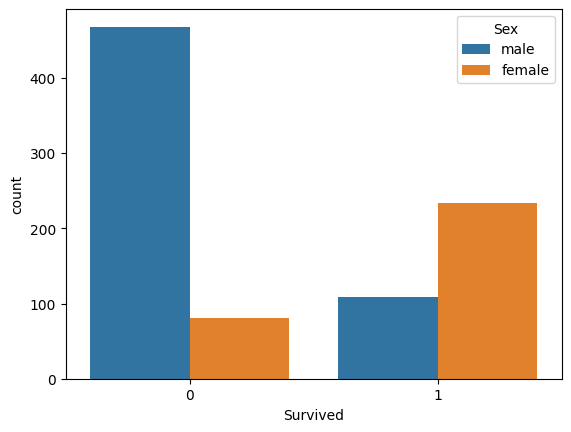

In [218]:
sns.countplot(x=titanic_train["Survived"], hue=titanic_train["Sex"])

<Axes: xlabel='Survived', ylabel='count'>

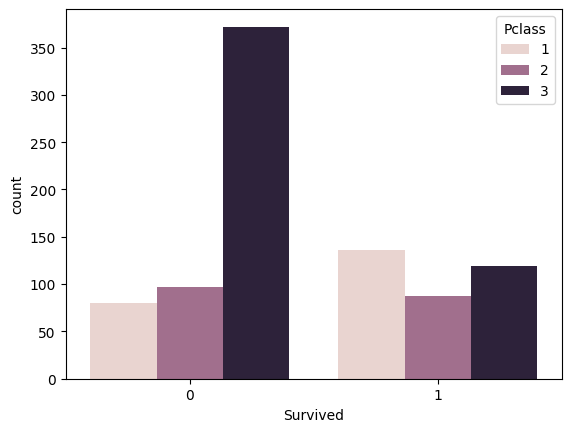

In [219]:
sns.countplot(x=titanic_train["Survived"], hue=titanic_train["Pclass"])

<Axes: xlabel='Survived', ylabel='Age'>

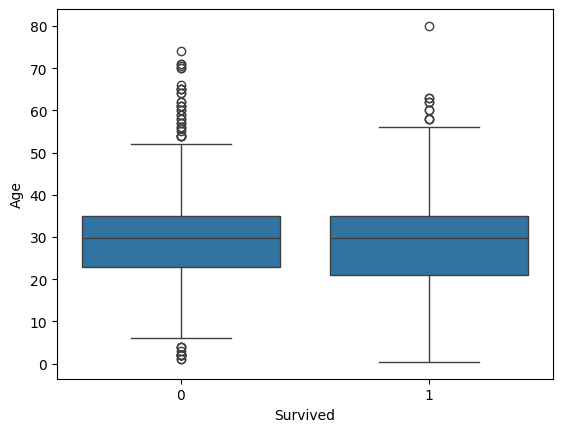

In [220]:
sns.boxplot(x=titanic_train["Survived"], y=titanic_train["Age"])

<Axes: xlabel='Pclass', ylabel='Age'>

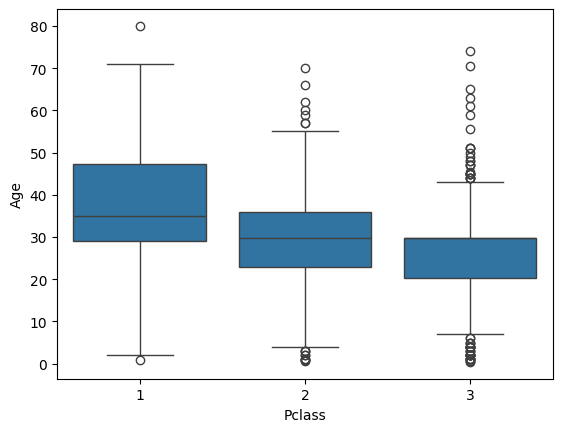

In [221]:
sns.boxplot(x=titanic_train["Pclass"], y =titanic_train["Age"])

<Axes: xlabel='Survived', ylabel='Age'>

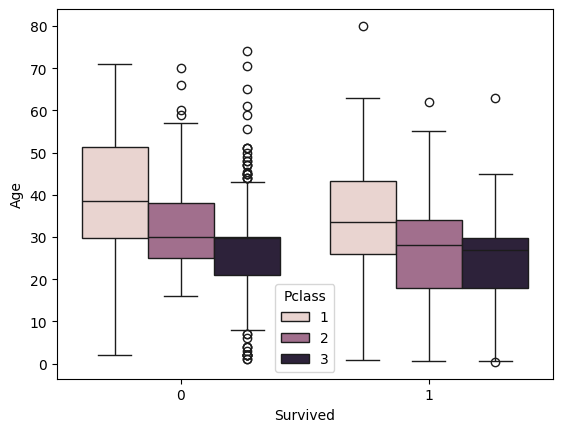

In [222]:
sns.boxplot(x=titanic_train["Survived"], y=titanic_train["Age"], hue=titanic_train["Pclass"])

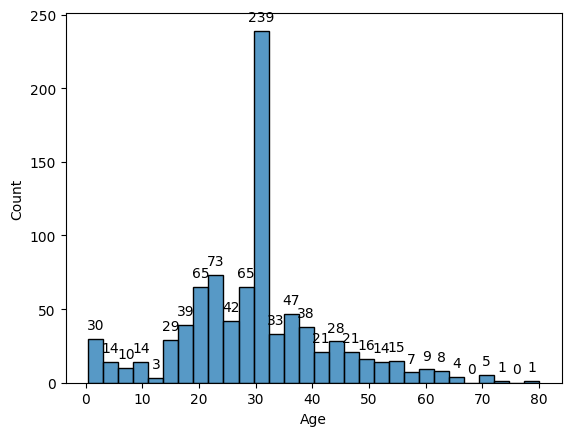

In [223]:
ax = sns.histplot(titanic_train["Age"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

In [224]:
# Check for more relatable columns
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\kaust\AppData\Local\Temp\ipykernel_19364\1153778371.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Embarked", data=titanic_train, palette="flare")


<Axes: xlabel='Embarked', ylabel='count'>

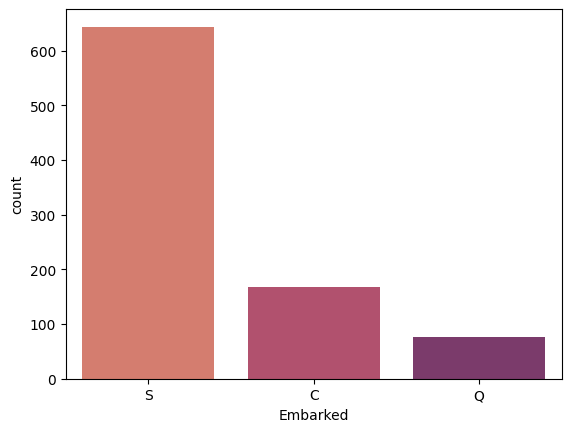

In [225]:
sns.countplot(x = "Embarked", data=titanic_train, palette="flare")

<Axes: xlabel='Embarked', ylabel='count'>

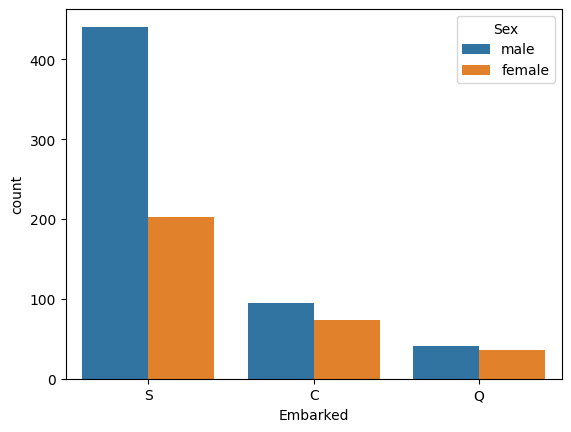

In [226]:
sns.countplot(x = "Embarked", data=titanic_train, hue = "Sex")

<Axes: xlabel='Embarked', ylabel='count'>

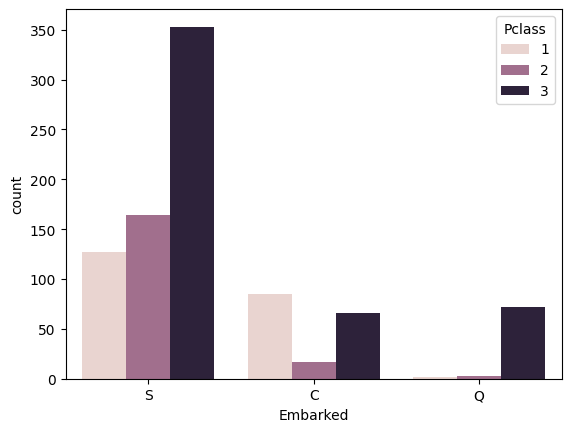

In [227]:
sns.countplot(x = "Embarked", data=titanic_train, hue = "Pclass")

<Axes: xlabel='Embarked', ylabel='count'>

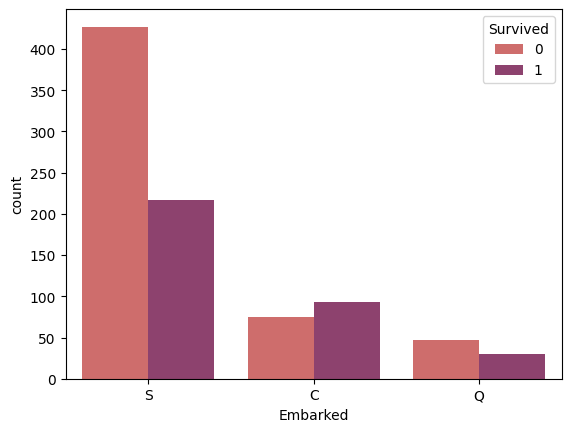

In [228]:
sns.countplot(x = "Embarked", data=titanic_train, hue = "Survived", palette="flare")

<Axes: xlabel='SibSp', ylabel='count'>

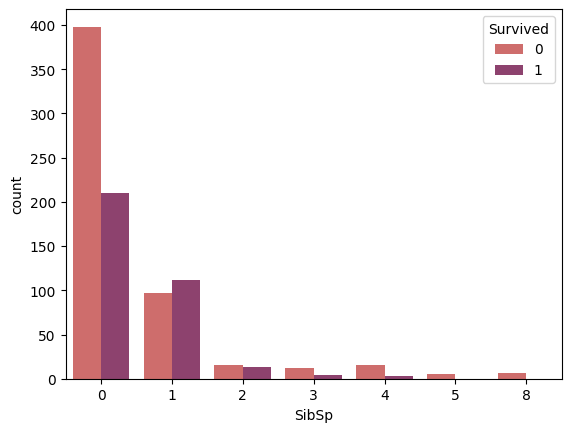

In [229]:
sns.countplot(x=titanic_train["SibSp"], hue=titanic_train["Survived"], palette="flare")

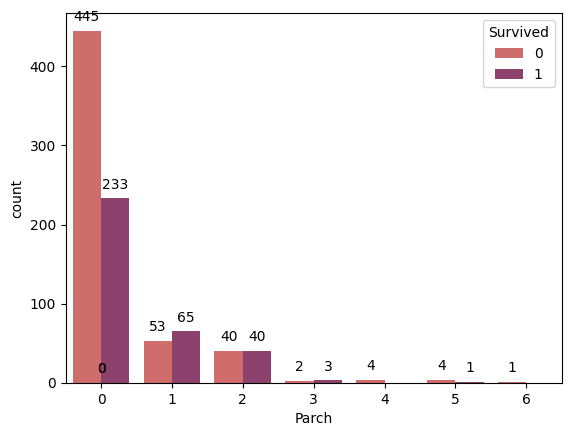

In [230]:
ax =sns.countplot(x=titanic_train["Parch"], hue=titanic_train["Survived"], palette="flare")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

In [231]:
# Simplifying columns / Removing that are not required for model generation

titanic_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [232]:
dummy =pd.get_dummies(data=titanic_train, columns =['Sex', 'Embarked', "Pclass"], drop_first=True)
dummy.drop(["PassengerId", "Survived", "SibSp", "Parch", "Age"], axis=1, inplace=True)

dummy.head(2)


,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,7.2500,True,False,True,False,True
1,71.2833,False,False,False,False,False


In [233]:
titanic_train = pd.concat([titanic_train, dummy], axis = 1)
titanic_train.drop(["Pclass", "Fare", "Sex", "Embarked"], axis =1, inplace = True)


In [234]:

titanic_train.head(2)

,PassengerId,Survived,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,22.0,1,0,True,False,True,False,True
1,2,1,38.0,1,0,False,False,False,False,False


## ML Model Generation
### Train & Test

In [235]:
x = titanic_train.drop(["Survived"], axis=1)
y = titanic_train["Survived"] 

In [236]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 )

In [237]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [238]:
prediction = model.predict(x_test)

In [239]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[156,  13],
       [ 32,  67]], dtype=int64)

In [240]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.832089552238806

## Importing test.csv file to see our model's performance on unseen data.
The 'Survived' column is missing in this dataset and our model will predict if they survived or not

In [241]:
titanic_test = pd.read_csv(r"C:\Users\kaust\OneDrive\Desktop\Intellipaat\Practice Data Science\titanic\test.csv")
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [242]:
# Fitting test dataset according to our model

dummy1 = pd.get_dummies(titanic_test, columns=['Sex','Embarked', 'Pclass'], drop_first=True)
dummy1.drop(["PassengerId", "Name", "Ticket", "SibSp", "Parch", "Age"], axis =1, inplace=True)


In [243]:
titanic_test = pd.concat([titanic_test, dummy1], axis =1)
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,7.8292,NaN,True,True,False,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,7.0000,NaN,False,False,True,False,True


In [244]:
titanic_test.drop([ "Pclass", "Embarked", "Ticket", "Fare", "Sex", "Name", "Cabin"], axis=1, inplace=True)
titanic_test.head(2)

,PassengerId,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,34.5,0,0,True,True,False,False,True
1,893,47.0,1,0,False,False,True,False,True


In [245]:
titanic_test["Age"].replace([np.nan], titanic_train["Age"].mean(), inplace=True)
titanic_test.isnull().sum()


C:\Users\kaust\AppData\Local\Temp\ipykernel_19364\613446943.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test["Age"].replace([np.nan], titanic_train["Age"].mean(), inplace=True)


PassengerId    0
Age            0
SibSp          0
Parch          0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Pclass_2       0
Pclass_3       0
dtype: int64

Setting input variable for results. [ y = f(x)]

In [246]:
x = titanic_test
new_predictions = model.predict(x)

In [247]:
new_predictions
mySolution = pd.DataFrame()
mySolution['Survived'] = new_predictions
mySolution.head(5)

,Survived
0,0
1,0
2,0
3,0
4,1


Merging 'Survived' with 'PassengerId' to check who survived.
(As mentioned on Kaggle's submission rule)

In [248]:
mySolution = pd.concat([titanic_test["PassengerId"], mySolution["Survived"]], axis = 1)
mySolution

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [249]:
import os

os.chdir(r"C:\Users\kaust\OneDrive\Desktop\Intellipaat\Practice Data Science\titanic")
mySolution.to_csv("mySolution.csv")